In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'GOOG'
data = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)

In [5]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
0,2013-01-02,17.969599,18.013729,18.107130,17.846855,17.918339,102033017
1,2013-01-03,17.980036,18.024191,18.229919,17.950716,18.055573,93075567
2,2013-01-04,18.335327,18.380356,18.467529,18.124067,18.165413,110954331
3,2013-01-07,18.255327,18.300158,18.415474,18.196297,18.317591,66476239
4,2013-01-08,18.219299,18.264042,18.338762,18.043119,18.319834,67295297
...,...,...,...,...,...,...,...
2763,2023-12-22,142.370361,142.720001,143.250000,142.054993,142.130005,18494700
2764,2023-12-26,142.470123,142.820007,143.945007,142.500000,142.979996,11170100
2765,2023-12-27,141.093506,141.440002,143.320007,141.050995,142.830002,17288400


In [6]:
ma_100_days = data.Close.rolling(100).mean()

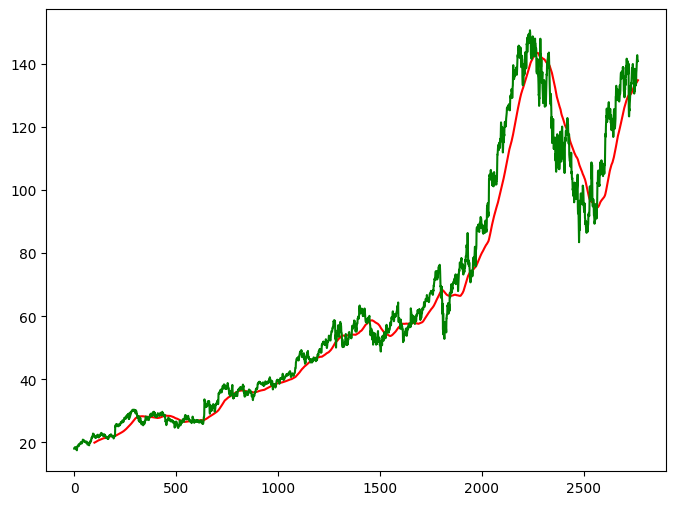

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')

In [8]:
ma_200_days = data.Close.rolling(200).mean()

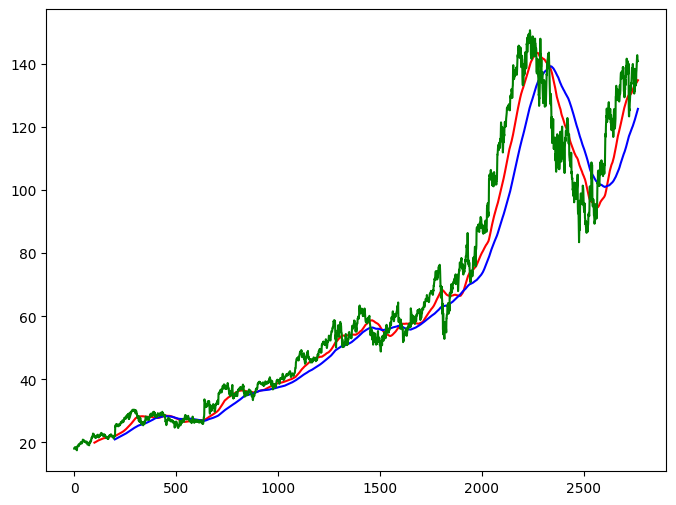

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')

In [10]:
data.dropna(inplace=True)

In [11]:
data_train = data.Close[0: int(len(data)*0.80)]
data_test = data.Close[int(len(data)*0.80): len(data)]

In [12]:
data_train.shape[0]

2214

In [13]:
data_test.shape[0]

554

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100 , data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [17]:
x , y = np.array(x) , np.array(y)

In [18]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [20]:
model = Sequential()
model.add(LSTM(units = 50 , activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu' , return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [22]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
model.fit(x,y,epochs = 50, batch_size = 32, verbose = 1)

Epoch 1/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 29s 270ms/step - loss: 0.0505
Epoch 2/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 259ms/step - loss: 0.0060
Epoch 3/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 265ms/step - loss: 0.0045
Epoch 4/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 267ms/step - loss: 0.0046
Epoch 5/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 21s 266ms/step - loss: 0.0040
Epoch 6/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 262ms/step - loss: 0.0037
Epoch 7/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - loss: 0.0038
Epoch 8/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 261ms/step - loss: 0.0030
Epoch 9/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 267ms/step - loss: 0.0033
Epoch 10/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 273ms/step - loss: 0.0028
Epoch 11/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 437s 7s/step - loss: 0.0032
Epoch 12/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 276ms/step - loss: 0.0033
Epoch 13/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 269ms/step - loss: 0.0031
Epoch 14/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 264ms/step - loss: 0.0033
Epoch 15/50
67/67 ━━━━━━━━━━━━━━━━━━━━ 18s 27

In [24]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100, 60)             │          26,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100, 60)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 100, 80)             │          45,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100, 80)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 120)                 │          96,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             121 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [25]:
pass_100_days = data_train.tail(100)

In [26]:
data_test = pd.concat([pass_100_days,data_test], ignore_index = True)

In [27]:
data_test_scale = scaler.fit_transform(data_test)

In [28]:
x = []
y = []

for i in range(100 , data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

In [29]:
x , y = np.array(x) , np.array(y)

In [30]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 179ms/step


In [32]:
p = 1/scaler.scale_

In [33]:
y_predict = y_predict*p

In [34]:
y = y*p

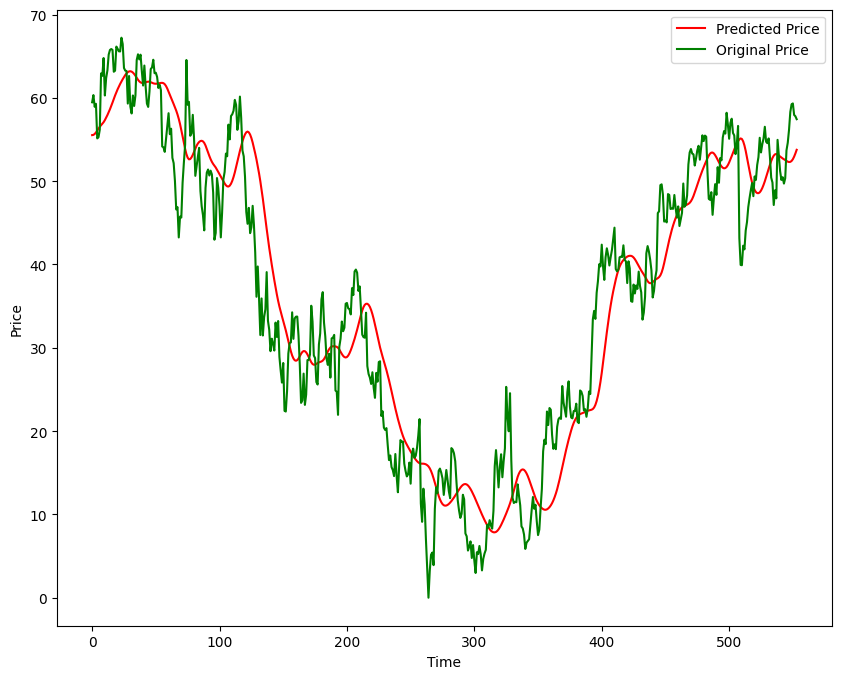

In [36]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r' ,label = 'Predicted Price')
plt.plot(y, 'g' ,label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [39]:
model.save('Stock Predictions Model.keras')